## ROC Curves and AUC

Sandbox to experiment with ROC Curves and AUC.

Resources:
- https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077
- https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve.ipynb

In [44]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


### Generate Dataset

To start experimenting with ROC techniques, let's create a synthetic dataset for two classes.

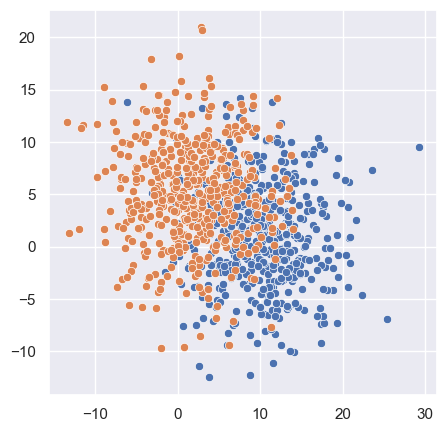

In [6]:
# Parameters
np.random.seed(42)
scale = 5
size = 500

# Generate class 1
class1_x = np.random.normal(loc=10, scale=scale, size=size)
class1_y = np.random.normal(loc=1, scale=scale, size=size)
# Generate class 2
class2_x = np.random.normal(loc=1, scale=scale, size=size)
class2_y = np.random.normal(loc=5, scale=scale, size=size)

# Inspect overlap
plt.figure(figsize=(5, 5))
sns.scatterplot(x=class1_x, y=class1_y)
sns.scatterplot(x=class2_x, y=class2_y)
plt.show()


In [22]:
# Create dataframe
df_class1 = pd.DataFrame()
df_class1['x'] = class1_x
df_class1['y'] = class1_y
df_class1['class'] = 0

df_class2 = pd.DataFrame()
df_class2['x'] = class2_x
df_class2['y'] = class2_y
df_class2['class'] = 1

df = pd.concat([df_class1, df_class2], ignore_index=True)


### Fit Classifier Model

Let's fit a simple classifier model to the data.

In [23]:
# Get dependent and independent variables
X = df.drop(columns=['class'])
y = df['class']


In [24]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       112
           1       0.76      0.82      0.79        88

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



<Axes: xlabel='x', ylabel='y'>

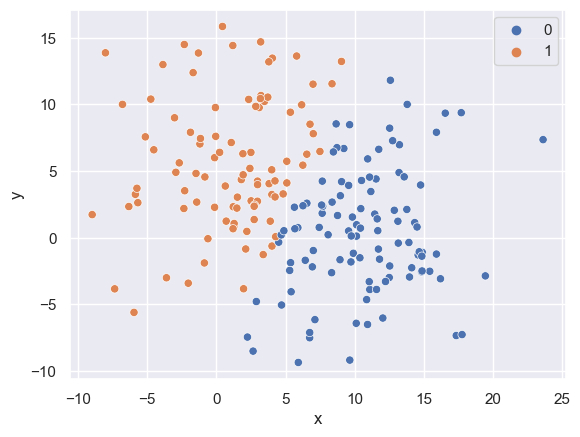

In [30]:
# Fit
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(metrics.classification_report(y_test, model.predict(X_test)))
sns.scatterplot(x=X_test['x'], y=X_test['y'], hue=y_pred)


### ROC Curve

We're now ready to generate the ROC Curve and AUC.

In [43]:
# Get probabilities for each class
y_proba = model.predict_proba(X_test)
y_proba[:5]


array([[0.00423155, 0.99576845],
       [0.09333391, 0.90666609],
       [0.95521178, 0.04478822],
       [0.05186794, 0.94813206],
       [0.95565197, 0.04434803]])

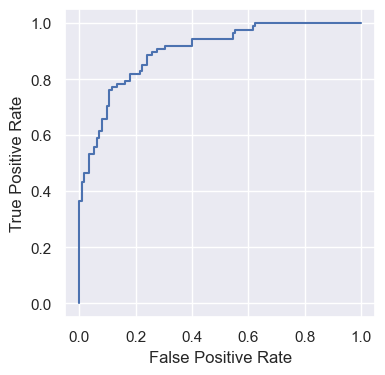

In [41]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_display.figure_.set_size_inches(4, 4)


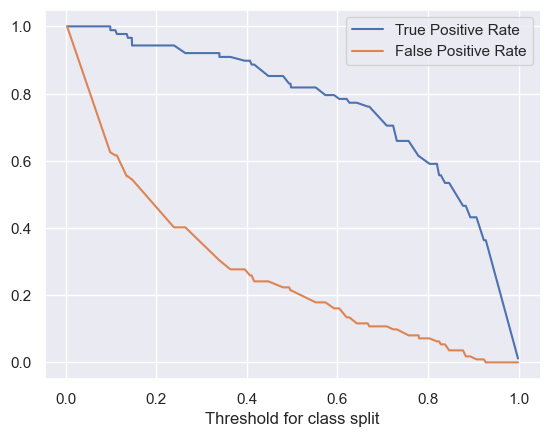

In [59]:
# Explore thresholds
plt.plot(thresholds[1:], tpr[1:], label='True Positive Rate')
plt.plot(thresholds[1:], fpr[1:], label='False Positive Rate')
plt.xlabel('Threshold for class split')
plt.legend()
plt.show()


In [60]:
# AUC
print(f"AUC: {roc_auc_score(y_test, y_pred):.4f}")


AUC: 0.8064
